# Text Classification

Here is the first lesson on TensorFlow. It is around [text classification](https://www.tensorflow.org/tutorials/keras/basic_text_classification). This will be an example of a binary or two-class classification. It will classify movie reviews as either positive or negative based on the text of the review.  
  
We will use the [IMDB dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb) that contains 50,000 movie reviews. We will split them into 25,000 for training and 25,000 for testing. We will pass in the parameter 'num_words' that will keep the 10,000 most frequently occuring words. If we brought in every word our dataset would be massive.

In [19]:
#Import keras and helper libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Download the built-in dataset
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


**Exploring the Data**  
LIke any dataset you are going to use we need to explore it to get a feel for it. This will help us preprocess the data as well as build a model. The first steps are to see the size of your data. Next you would see what the actual content of the data. There are many more steps and each dataset will reveal when you need to do when you start training.  
  
In the following code you can see that we have 25,000 reviews and those reviews are broken down by replacing the words with integer values representing the specific word in the dictionary.

In [5]:
print('Training entries: {}, labels {}'.format(len(train_data), len(train_labels)))
print(train_data[0])

Training entries: 25000, labels 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In the previous notebook, every image was the same size so we knew what side our first layer of the neural network needed to be. In this dataset, each review is different lengths so we will need to handle that later.

In [7]:
print('First review length: {}, Second review length: {}'.format(len(train_data[0]),len(train_data[1])))

First review length: 218, Second review length: 189


**Convert Ints back to Words**  
Here is the code to convert the integers back to their actual words. This will be nice to have to validate your work.

In [8]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [9]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

**Preprocessing the Data**  
First, we need to convert the words to tensors so that we can feed them into the neural network.  
  
We can do this 2 ways. First, we can do what they call one-hot encoding. I have done this in most of my assignments that revolved around text. What you do is created a column for each of the words and if that word is in the text you set it to 1. If it isn't, you set it to 0. The obvious downside is that we would have 10k extra columns. Second, we can pad the reviews so that they are all the same length. This is the approach the lesson decided to use.

In [12]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                      value=word_index["<PAD>"],
                                                      padding='post',
                                                      maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value=word_index["<PAD>"],
                                                      padding='post',
                                                      maxlen=256)

#Validate
print('First review length: {}, Second review length: {}'.format(len(train_data[0]),len(train_data[1])))

First review length: 256, Second review length: 256


**Build the Model**  
We need to make 2 decisions. First, how many layers. Second, how many units/neurons for each layer.  

In [13]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


Here is a breakdown of the layers  
  
**vocab_size**: We need the input layer to be the same size as our text we are passing in.  
**Embedding**: This takes in the int encoding and looks up the embedding vector for each word-index. These vectors are learned as the model trains. This adds a dimension to the output array (batch, sequence, embedding).  
**GlobalAveragePooling1D**: This layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length.  
**Dense(16, activation=tf.nn.relu))**: This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units.  
**Dense(1, activation=tf.nn.sigmoid))**: Densely connected with a single output node (Positive or negative review). Using sigmoid makes this value between 0 and 1 representing a probability level.

**Hidden Units**  
Our neural network has 2 hidden layers between the input and output layers. The number of hidden layers and units allows the network a much larger freedom to learn. But, the downside is that it is much more computationally expensive.

**Loss function and optimizer**  
Every model needs a loss function and an optimizer for training. This model is a binary classification with a single probability output we will use *binary_crossentropy* loss function.  

In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Validation Set**  
In the previous notebook we were just given the validation set. This time we will create out own. The need for a validation set is that we need to check out work with data that the network has NEVER seen. This is different than the *testing* set that we will use to test our model. The validation set is used during training to tune our model. For our validation we will set aside 10k rows.

In [15]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

**Train the model**  
We will train the model using 40 epochs and mini-batches of 512 samples. This means that we iteration 40 times over all the samples in the training set.

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 65us/step - loss: 0.6912 - acc: 0.5649 - val_loss: 0.6888 - val_acc: 0.5882
Epoch 2/40
15000/15000 [==============================] - 1s 50us/step - loss: 0.6845 - acc: 0.6528 - val_loss: 0.6806 - val_acc: 0.7152
Epoch 3/40
15000/15000 [==============================] - 1s 48us/step - loss: 0.6722 - acc: 0.7279 - val_loss: 0.6658 - val_acc: 0.7295
Epoch 4/40
15000/15000 [==============================] - 1s 49us/step - loss: 0.6513 - acc: 0.7651 - val_loss: 0.6428 - val_acc: 0.7469
Epoch 5/40
15000/15000 [==============================] - 1s 47us/step - loss: 0.6209 - acc: 0.7867 - val_loss: 0.6102 - val_acc: 0.7803
Epoch 6/40
15000/15000 [==============================] - 1s 47us/step - loss: 0.5821 - acc: 0.8075 - val_loss: 0.5722 - val_acc: 0.7984
Epoch 7/40
15000/15000 [==============================] - 1s 52us/step - loss: 0.5379 - acc: 0.8274 - val_loss: 0.5314 - val_acc

**Evaluate the Model**  
Now, we will evaluate how well we did in our training. We will get two return values (same as the last notebook). The first is the loss (error) and accuracty.

In [17]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 0s 19us/step
[0.32605546572208405, 0.8732]


**Graph Accuracy and Loss Over Time**  
We will use the *History* object that is returned from *model.fit()*

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

The history dictionary has 4 entries. One for each monitored metric during training and validation. We can plot these to give us some visibility into the training of the model.

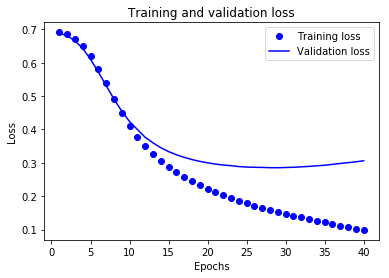

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

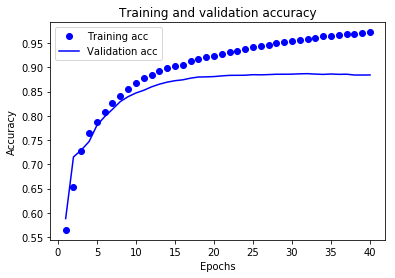

In [21]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

These two plots show you the loss values and the accuracy for each dataset over each of the 40 epochs.  
  
If you notice that each graph shows that we peak on the validation set around 20 epochs. This is when overfitting starts to show up. The model preforms better on the training set but the validation set doesn't get better. At this point, the model learns the specifics of the training set instead of learning the generalized information.

 @title MIT License

 Copyright (c) 2017 François Chollet

 Permission is hereby granted, free of charge, to any person obtaining a
 copy of this software and associated documentation files (the "Software"),
 to deal in the Software without restriction, including without limitation
 the rights to use, copy, modify, merge, publish, distribute, sublicense,
 and/or sell copies of the Software, and to permit persons to whom the
 Software is furnished to do so, subject to the following conditions:

 The above copyright notice and this permission notice shall be included in
 all copies or substantial portions of the Software.

 THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
 THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
 FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
 DEALINGS IN THE SOFTWARE.